# Import bibliotek

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

import torch
from torch import nn
from torchvision import transforms

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tqdm.auto import tqdm
from timeit import default_timer as timer 

import os

from typing import List, Dict

In [3]:
import sys
sys.path.append("../src/")

from data_setup import create_dataloaders
from model_builder import HybridModel
from engine import train_step, test_step, train

# Wczytanie danych

In [4]:
df = pd.read_csv("../data/datasets_sum.csv")
df

,Emotion,Path,Dataset,Emotion_mapped
0,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,0
1,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Crema,0
2,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,1
3,NEUTRAL,../data/kaggle/input/speech-emotion-recognitio...,Crema,1
4,DISGUST,../data/kaggle/input/speech-emotion-recognitio...,Crema,2
...,...,...,...,...
9390,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9391,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9392,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0
9393,ANGRY,../data/kaggle/input/speech-emotion-recognitio...,Tess,0


In [5]:
SAMPLE_RATE = 44100
SEED = 42

In [6]:
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df["Emotion_mapped"], random_state=SEED)

In [7]:
original_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

augment_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485], std=[0.229])
])

In [8]:
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dataframe=train_df, 
    test_dataframe=test_df, 
    original_transform=original_transform, 
    augment_transform=augment_transform,
    batch_size=32
)

In [9]:
train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x13200d430>,
 array(['DISGUST', 'ANGRY', 'FEAR', 'HAPPY', 'NEUTRAL'], dtype=object))

# Model

## Uczenie

In [10]:
from data_setup import create_dataloaders
from engine import train_step, test_step, train

device = torch.device("mps") if torch.backends.mps.is_available() else "cpu"

torch.manual_seed(SEED) 
torch.mps.manual_seed(SEED)

NUM_EPOCHS = 100

model = HybridModel(num_emotions=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

start_time = timer()

model_results = train(model=model, 
                      train_dataloader=train_dataloader,
                      test_dataloader=test_dataloader,
                      optimizer=optimizer,
                      loss_fn=loss_fn, 
                      epochs=NUM_EPOCHS,
                      device=device)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  1%|          | 1/100 [03:14<5:20:37, 194.31s/it]

Epoch: 1 | train_loss: 1.5117 | train_acc: 0.3165 | test_loss: 1.8355 | test_acc: 0.2489


  2%|▏         | 2/100 [06:27<5:15:58, 193.45s/it]

Epoch: 2 | train_loss: 1.4012 | train_acc: 0.3884 | test_loss: 2.0526 | test_acc: 0.2420


  3%|▎         | 3/100 [09:37<5:10:10, 191.86s/it]

Epoch: 3 | train_loss: 1.3353 | train_acc: 0.4348 | test_loss: 1.9972 | test_acc: 0.2206


  4%|▍         | 4/100 [12:46<5:05:08, 190.71s/it]

Epoch: 4 | train_loss: 1.3015 | train_acc: 0.4496 | test_loss: 2.1473 | test_acc: 0.2979


  5%|▌         | 5/100 [46:13<22:19:01, 845.70s/it]

Epoch: 5 | train_loss: 1.2494 | train_acc: 0.4779 | test_loss: 2.2055 | test_acc: 0.2526


  6%|▌         | 6/100 [56:34<20:05:39, 769.57s/it]

Epoch: 6 | train_loss: 1.2031 | train_acc: 0.5057 | test_loss: 2.4011 | test_acc: 0.2343


  7%|▋         | 7/100 [1:15:08<22:47:11, 882.06s/it]

Epoch: 7 | train_loss: 1.1549 | train_acc: 0.5229 | test_loss: 2.2975 | test_acc: 0.1939


  8%|▊         | 8/100 [1:18:49<17:09:56, 671.70s/it]

Epoch: 8 | train_loss: 1.1191 | train_acc: 0.5476 | test_loss: 2.5298 | test_acc: 0.2161


  9%|▉         | 9/100 [1:21:58<13:09:45, 520.72s/it]

Epoch: 9 | train_loss: 1.0882 | train_acc: 0.5554 | test_loss: 2.3884 | test_acc: 0.1953


 10%|█         | 10/100 [1:25:11<10:29:14, 419.50s/it]

Epoch: 10 | train_loss: 1.0602 | train_acc: 0.5713 | test_loss: 2.4659 | test_acc: 0.1649


 11%|█         | 11/100 [1:28:34<8:43:57, 353.23s/it] 

Epoch: 11 | train_loss: 1.0373 | train_acc: 0.5748 | test_loss: 2.4473 | test_acc: 0.2066


 12%|█▏        | 12/100 [1:31:53<7:29:05, 306.20s/it]

Epoch: 12 | train_loss: 1.0210 | train_acc: 0.5852 | test_loss: 2.4685 | test_acc: 0.1827


 13%|█▎        | 13/100 [1:35:22<6:41:19, 276.77s/it]

Epoch: 13 | train_loss: 0.9999 | train_acc: 0.5959 | test_loss: 2.6669 | test_acc: 0.1704


 14%|█▍        | 14/100 [1:39:04<6:13:03, 260.28s/it]

Epoch: 14 | train_loss: 0.9876 | train_acc: 0.6063 | test_loss: 2.6775 | test_acc: 0.1479


 15%|█▌        | 15/100 [1:42:37<5:48:47, 246.20s/it]

Epoch: 15 | train_loss: 0.9697 | train_acc: 0.6099 | test_loss: 2.7479 | test_acc: 0.1746


 16%|█▌        | 16/100 [1:46:05<5:28:34, 234.70s/it]

Epoch: 16 | train_loss: 0.9658 | train_acc: 0.6149 | test_loss: 2.7533 | test_acc: 0.1557


 17%|█▋        | 17/100 [1:49:41<5:16:48, 229.02s/it]

Epoch: 17 | train_loss: 0.9497 | train_acc: 0.6179 | test_loss: 2.8143 | test_acc: 0.1834


 18%|█▊        | 18/100 [1:53:25<5:10:42, 227.35s/it]

Epoch: 18 | train_loss: 0.9464 | train_acc: 0.6139 | test_loss: 2.7878 | test_acc: 0.1925


 19%|█▉        | 19/100 [1:57:11<5:06:34, 227.10s/it]

Epoch: 19 | train_loss: 0.9354 | train_acc: 0.6210 | test_loss: 2.6580 | test_acc: 0.1725


 20%|██        | 20/100 [2:01:02<5:04:09, 228.12s/it]

Epoch: 20 | train_loss: 0.9294 | train_acc: 0.6245 | test_loss: 2.5727 | test_acc: 0.1648


 21%|██        | 21/100 [2:04:40<4:56:32, 225.23s/it]

Epoch: 21 | train_loss: 0.9263 | train_acc: 0.6286 | test_loss: 2.7229 | test_acc: 0.1662


 22%|██▏       | 22/100 [2:08:03<4:44:14, 218.65s/it]

Epoch: 22 | train_loss: 0.9085 | train_acc: 0.6293 | test_loss: 2.5702 | test_acc: 0.1783


 23%|██▎       | 23/100 [2:11:22<4:32:47, 212.57s/it]

Epoch: 23 | train_loss: 0.9108 | train_acc: 0.6326 | test_loss: 2.9743 | test_acc: 0.1565


 24%|██▍       | 24/100 [2:14:33<4:20:58, 206.04s/it]

Epoch: 24 | train_loss: 0.8962 | train_acc: 0.6406 | test_loss: 2.9456 | test_acc: 0.1855


 25%|██▌       | 25/100 [2:17:42<4:11:13, 200.98s/it]

Epoch: 25 | train_loss: 0.8935 | train_acc: 0.6429 | test_loss: 2.8908 | test_acc: 0.1606


 26%|██▌       | 26/100 [2:20:52<4:03:59, 197.83s/it]

Epoch: 26 | train_loss: 0.8860 | train_acc: 0.6410 | test_loss: 2.9193 | test_acc: 0.1571


 27%|██▋       | 27/100 [2:24:10<4:00:38, 197.79s/it]

Epoch: 27 | train_loss: 0.8949 | train_acc: 0.6381 | test_loss: 2.7969 | test_acc: 0.1637


 28%|██▊       | 28/100 [2:27:22<3:55:06, 195.92s/it]

Epoch: 28 | train_loss: 0.8829 | train_acc: 0.6448 | test_loss: 2.9452 | test_acc: 0.1862


 29%|██▉       | 29/100 [2:30:34<3:50:34, 194.85s/it]

Epoch: 29 | train_loss: 0.8649 | train_acc: 0.6538 | test_loss: 3.2402 | test_acc: 0.1785


 30%|███       | 30/100 [2:33:46<3:46:18, 193.98s/it]

Epoch: 30 | train_loss: 0.8663 | train_acc: 0.6488 | test_loss: 3.0365 | test_acc: 0.1290


 31%|███       | 31/100 [2:36:58<3:42:30, 193.49s/it]

Epoch: 31 | train_loss: 0.8675 | train_acc: 0.6537 | test_loss: 3.1130 | test_acc: 0.1739


 32%|███▏      | 32/100 [2:40:17<3:41:04, 195.06s/it]

Epoch: 32 | train_loss: 0.8548 | train_acc: 0.6577 | test_loss: 2.9881 | test_acc: 0.1479


 33%|███▎      | 33/100 [2:43:30<3:37:12, 194.52s/it]

Epoch: 33 | train_loss: 0.8534 | train_acc: 0.6596 | test_loss: 3.1721 | test_acc: 0.1599


 34%|███▍      | 34/100 [2:46:44<3:33:36, 194.19s/it]

Epoch: 34 | train_loss: 0.8521 | train_acc: 0.6574 | test_loss: 3.1310 | test_acc: 0.1486


 35%|███▌      | 35/100 [2:49:57<3:30:12, 194.04s/it]

Epoch: 35 | train_loss: 0.8400 | train_acc: 0.6601 | test_loss: 3.2516 | test_acc: 0.1395


 36%|███▌      | 36/100 [2:53:12<3:27:06, 194.16s/it]

Epoch: 36 | train_loss: 0.8376 | train_acc: 0.6649 | test_loss: 3.4006 | test_acc: 0.1578


 37%|███▋      | 37/100 [2:56:33<3:26:13, 196.41s/it]

Epoch: 37 | train_loss: 0.8385 | train_acc: 0.6664 | test_loss: 3.3459 | test_acc: 0.1589


 38%|███▊      | 38/100 [2:59:48<3:22:32, 196.00s/it]

Epoch: 38 | train_loss: 0.8319 | train_acc: 0.6676 | test_loss: 3.0039 | test_acc: 0.1402


 39%|███▉      | 39/100 [3:03:03<3:18:45, 195.50s/it]

Epoch: 39 | train_loss: 0.8248 | train_acc: 0.6693 | test_loss: 3.2392 | test_acc: 0.1477


 40%|████      | 40/100 [3:06:18<3:15:18, 195.31s/it]

Epoch: 40 | train_loss: 0.8287 | train_acc: 0.6674 | test_loss: 3.0890 | test_acc: 0.1658


 41%|████      | 41/100 [3:09:37<3:13:20, 196.62s/it]

Epoch: 41 | train_loss: 0.8257 | train_acc: 0.6705 | test_loss: 3.0309 | test_acc: 0.1644


 42%|████▏     | 42/100 [3:12:52<3:09:29, 196.03s/it]

Epoch: 42 | train_loss: 0.8279 | train_acc: 0.6692 | test_loss: 3.1161 | test_acc: 0.1595


 43%|████▎     | 43/100 [3:16:05<3:05:16, 195.03s/it]

Epoch: 43 | train_loss: 0.8146 | train_acc: 0.6708 | test_loss: 3.2776 | test_acc: 0.1567


 44%|████▍     | 44/100 [3:19:17<3:01:18, 194.25s/it]

Epoch: 44 | train_loss: 0.8124 | train_acc: 0.6750 | test_loss: 3.2658 | test_acc: 0.1335


 45%|████▌     | 45/100 [3:22:34<2:58:55, 195.20s/it]

Epoch: 45 | train_loss: 0.8064 | train_acc: 0.6805 | test_loss: 3.1719 | test_acc: 0.1420


 46%|████▌     | 46/100 [3:25:47<2:55:01, 194.47s/it]

Epoch: 46 | train_loss: 0.8063 | train_acc: 0.6823 | test_loss: 3.2524 | test_acc: 0.1574


 47%|████▋     | 47/100 [3:28:59<2:51:07, 193.72s/it]

Epoch: 47 | train_loss: 0.7900 | train_acc: 0.6839 | test_loss: 3.3737 | test_acc: 0.1374


 48%|████▊     | 48/100 [3:32:12<2:47:33, 193.33s/it]

Epoch: 48 | train_loss: 0.8020 | train_acc: 0.6781 | test_loss: 3.3207 | test_acc: 0.1358


 49%|████▉     | 49/100 [3:35:30<2:45:29, 194.69s/it]

Epoch: 49 | train_loss: 0.7918 | train_acc: 0.6885 | test_loss: 3.7872 | test_acc: 0.1301


 50%|█████     | 50/100 [3:38:43<2:41:49, 194.19s/it]

Epoch: 50 | train_loss: 0.7966 | train_acc: 0.6842 | test_loss: 3.4185 | test_acc: 0.1606


 51%|█████     | 51/100 [3:41:54<2:37:53, 193.34s/it]

Epoch: 51 | train_loss: 0.7912 | train_acc: 0.6851 | test_loss: 3.2746 | test_acc: 0.1518


 52%|█████▏    | 52/100 [3:45:06<2:34:28, 193.10s/it]

Epoch: 52 | train_loss: 0.7871 | train_acc: 0.6851 | test_loss: 3.3465 | test_acc: 0.1455


 53%|█████▎    | 53/100 [3:48:24<2:32:21, 194.50s/it]

Epoch: 53 | train_loss: 0.7857 | train_acc: 0.6883 | test_loss: 3.3719 | test_acc: 0.1441


 54%|█████▍    | 54/100 [3:51:36<2:28:33, 193.77s/it]

Epoch: 54 | train_loss: 0.7779 | train_acc: 0.6906 | test_loss: 3.3662 | test_acc: 0.1658


 55%|█████▌    | 55/100 [3:54:50<2:25:23, 193.86s/it]

Epoch: 55 | train_loss: 0.7866 | train_acc: 0.6854 | test_loss: 3.3501 | test_acc: 0.1452


 56%|█████▌    | 56/100 [3:58:04<2:22:04, 193.75s/it]

Epoch: 56 | train_loss: 0.7750 | train_acc: 0.6938 | test_loss: 3.6198 | test_acc: 0.1500


 57%|█████▋    | 57/100 [4:01:22<2:19:50, 195.14s/it]

Epoch: 57 | train_loss: 0.7725 | train_acc: 0.6940 | test_loss: 3.4759 | test_acc: 0.1258


 58%|█████▊    | 58/100 [4:04:36<2:16:12, 194.59s/it]

Epoch: 58 | train_loss: 0.7635 | train_acc: 0.6924 | test_loss: 3.4204 | test_acc: 0.1258


 59%|█████▉    | 59/100 [4:07:48<2:12:28, 193.86s/it]

Epoch: 59 | train_loss: 0.7733 | train_acc: 0.6905 | test_loss: 3.4176 | test_acc: 0.1388


 60%|██████    | 60/100 [4:11:06<2:10:05, 195.15s/it]

Epoch: 60 | train_loss: 0.7737 | train_acc: 0.6927 | test_loss: 3.6108 | test_acc: 0.1486


 61%|██████    | 61/100 [4:14:19<2:06:25, 194.49s/it]

Epoch: 61 | train_loss: 0.7698 | train_acc: 0.6903 | test_loss: 3.4216 | test_acc: 0.1031


 62%|██████▏   | 62/100 [4:17:32<2:02:56, 194.12s/it]

Epoch: 62 | train_loss: 0.7690 | train_acc: 0.6927 | test_loss: 3.4422 | test_acc: 0.1838


 63%|██████▎   | 63/100 [4:20:46<1:59:42, 194.12s/it]

Epoch: 63 | train_loss: 0.7571 | train_acc: 0.7043 | test_loss: 3.4363 | test_acc: 0.1472


 64%|██████▍   | 64/100 [4:24:06<1:57:34, 195.97s/it]

Epoch: 64 | train_loss: 0.7597 | train_acc: 0.6979 | test_loss: 3.4530 | test_acc: 0.1578


 65%|██████▌   | 65/100 [4:27:22<1:54:11, 195.75s/it]

Epoch: 65 | train_loss: 0.7573 | train_acc: 0.7011 | test_loss: 3.7251 | test_acc: 0.1658


 66%|██████▌   | 66/100 [4:30:37<1:50:50, 195.60s/it]

Epoch: 66 | train_loss: 0.7598 | train_acc: 0.7007 | test_loss: 3.3349 | test_acc: 0.1399


 67%|██████▋   | 67/100 [4:33:54<1:47:45, 195.93s/it]

Epoch: 67 | train_loss: 0.7428 | train_acc: 0.7086 | test_loss: 3.7271 | test_acc: 0.1676


 68%|██████▊   | 68/100 [4:37:14<1:45:14, 197.33s/it]

Epoch: 68 | train_loss: 0.7527 | train_acc: 0.6968 | test_loss: 3.5800 | test_acc: 0.1399


 69%|██████▉   | 69/100 [4:40:30<1:41:39, 196.75s/it]

Epoch: 69 | train_loss: 0.7449 | train_acc: 0.7130 | test_loss: 3.7474 | test_acc: 0.1743


 70%|███████   | 70/100 [4:43:45<1:38:07, 196.25s/it]

Epoch: 70 | train_loss: 0.7524 | train_acc: 0.7031 | test_loss: 3.9351 | test_acc: 0.1445


 71%|███████   | 71/100 [4:47:00<1:34:47, 196.11s/it]

Epoch: 71 | train_loss: 0.7416 | train_acc: 0.7078 | test_loss: 3.6554 | test_acc: 0.1437


 72%|███████▏  | 72/100 [4:50:21<1:32:10, 197.50s/it]

Epoch: 72 | train_loss: 0.7401 | train_acc: 0.7076 | test_loss: 3.7711 | test_acc: 0.1722


 73%|███████▎  | 73/100 [4:53:38<1:28:44, 197.21s/it]

Epoch: 73 | train_loss: 0.7329 | train_acc: 0.7084 | test_loss: 3.9032 | test_acc: 0.1399


 74%|███████▍  | 74/100 [4:56:54<1:25:21, 196.97s/it]

Epoch: 74 | train_loss: 0.7398 | train_acc: 0.7080 | test_loss: 3.9538 | test_acc: 0.1220


 75%|███████▌  | 75/100 [5:00:10<1:21:56, 196.67s/it]

Epoch: 75 | train_loss: 0.7482 | train_acc: 0.7007 | test_loss: 3.6384 | test_acc: 0.1567


 76%|███████▌  | 76/100 [5:03:31<1:19:09, 197.89s/it]

Epoch: 76 | train_loss: 0.7316 | train_acc: 0.7076 | test_loss: 3.7215 | test_acc: 0.1490


 77%|███████▋  | 77/100 [5:06:46<1:15:31, 197.04s/it]

Epoch: 77 | train_loss: 0.7280 | train_acc: 0.7153 | test_loss: 4.1330 | test_acc: 0.1230


 78%|███████▊  | 78/100 [5:10:00<1:11:57, 196.24s/it]

Epoch: 78 | train_loss: 0.7296 | train_acc: 0.7085 | test_loss: 3.6091 | test_acc: 0.1399


 79%|███████▉  | 79/100 [5:13:15<1:08:32, 195.82s/it]

Epoch: 79 | train_loss: 0.7299 | train_acc: 0.7117 | test_loss: 3.6175 | test_acc: 0.1515


 80%|████████  | 80/100 [5:16:35<1:05:42, 197.11s/it]

Epoch: 80 | train_loss: 0.7287 | train_acc: 0.7069 | test_loss: 4.0509 | test_acc: 0.1388


 81%|████████  | 81/100 [5:19:51<1:02:15, 196.59s/it]

Epoch: 81 | train_loss: 0.7303 | train_acc: 0.7173 | test_loss: 3.9240 | test_acc: 0.1680


 82%|████████▏ | 82/100 [5:23:04<58:42, 195.71s/it]  

Epoch: 82 | train_loss: 0.7215 | train_acc: 0.7178 | test_loss: 3.7044 | test_acc: 0.1351


 83%|████████▎ | 83/100 [5:26:20<55:25, 195.60s/it]

Epoch: 83 | train_loss: 0.7297 | train_acc: 0.7069 | test_loss: 3.4529 | test_acc: 0.1420


 84%|████████▍ | 84/100 [5:29:42<52:42, 197.67s/it]

Epoch: 84 | train_loss: 0.7244 | train_acc: 0.7121 | test_loss: 3.5393 | test_acc: 0.1342


 85%|████████▌ | 85/100 [5:32:57<49:13, 196.92s/it]

Epoch: 85 | train_loss: 0.7148 | train_acc: 0.7153 | test_loss: 3.7110 | test_acc: 0.1349


 86%|████████▌ | 86/100 [5:36:13<45:50, 196.45s/it]

Epoch: 86 | train_loss: 0.7209 | train_acc: 0.7150 | test_loss: 3.7156 | test_acc: 0.1402


 87%|████████▋ | 87/100 [5:39:29<42:31, 196.26s/it]

Epoch: 87 | train_loss: 0.7170 | train_acc: 0.7166 | test_loss: 3.7797 | test_acc: 0.1265


 88%|████████▊ | 88/100 [5:42:49<39:31, 197.59s/it]

Epoch: 88 | train_loss: 0.7082 | train_acc: 0.7203 | test_loss: 4.0719 | test_acc: 0.1539


 89%|████████▉ | 89/100 [5:46:04<36:04, 196.74s/it]

Epoch: 89 | train_loss: 0.7123 | train_acc: 0.7208 | test_loss: 3.9050 | test_acc: 0.1634


 90%|█████████ | 90/100 [5:49:18<32:40, 196.02s/it]

Epoch: 90 | train_loss: 0.7108 | train_acc: 0.7197 | test_loss: 3.8330 | test_acc: 0.1449


 91%|█████████ | 91/100 [5:52:35<29:25, 196.19s/it]

Epoch: 91 | train_loss: 0.7108 | train_acc: 0.7191 | test_loss: 3.8160 | test_acc: 0.1607


 92%|█████████▏| 92/100 [5:55:57<26:24, 198.01s/it]

Epoch: 92 | train_loss: 0.7083 | train_acc: 0.7199 | test_loss: 3.9279 | test_acc: 0.1451


 93%|█████████▎| 93/100 [5:59:15<23:06, 198.03s/it]

Epoch: 93 | train_loss: 0.7112 | train_acc: 0.7200 | test_loss: 3.7435 | test_acc: 0.1339


 94%|█████████▍| 94/100 [6:02:32<19:45, 197.55s/it]

Epoch: 94 | train_loss: 0.7029 | train_acc: 0.7236 | test_loss: 3.7548 | test_acc: 0.1434


 95%|█████████▌| 95/100 [6:05:49<16:27, 197.46s/it]

Epoch: 95 | train_loss: 0.7068 | train_acc: 0.7219 | test_loss: 3.6255 | test_acc: 0.1522


 96%|█████████▌| 96/100 [6:09:12<13:17, 199.29s/it]

Epoch: 96 | train_loss: 0.7046 | train_acc: 0.7232 | test_loss: 3.8560 | test_acc: 0.1592


 97%|█████████▋| 97/100 [6:12:31<09:57, 199.07s/it]

Epoch: 97 | train_loss: 0.7021 | train_acc: 0.7229 | test_loss: 3.9064 | test_acc: 0.1458


 98%|█████████▊| 98/100 [6:15:52<06:39, 199.61s/it]

Epoch: 98 | train_loss: 0.7059 | train_acc: 0.7199 | test_loss: 3.7053 | test_acc: 0.1381


Python(53842) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53844) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53856) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53858) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53869) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53886) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(53893) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54226) Malloc

Epoch: 99 | train_loss: 0.6939 | train_acc: 0.7263 | test_loss: 3.8079 | test_acc: 0.1297


Python(54406) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54412) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54415) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54434) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54443) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54445) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54447) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54449) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54457) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(54732) Malloc

Epoch: 100 | train_loss: 0.6899 | train_acc: 0.7263 | test_loss: 3.6889 | test_acc: 0.1314
Total training time: 19758.061 seconds


In [11]:
# Check the model_0_results keys
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [12]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

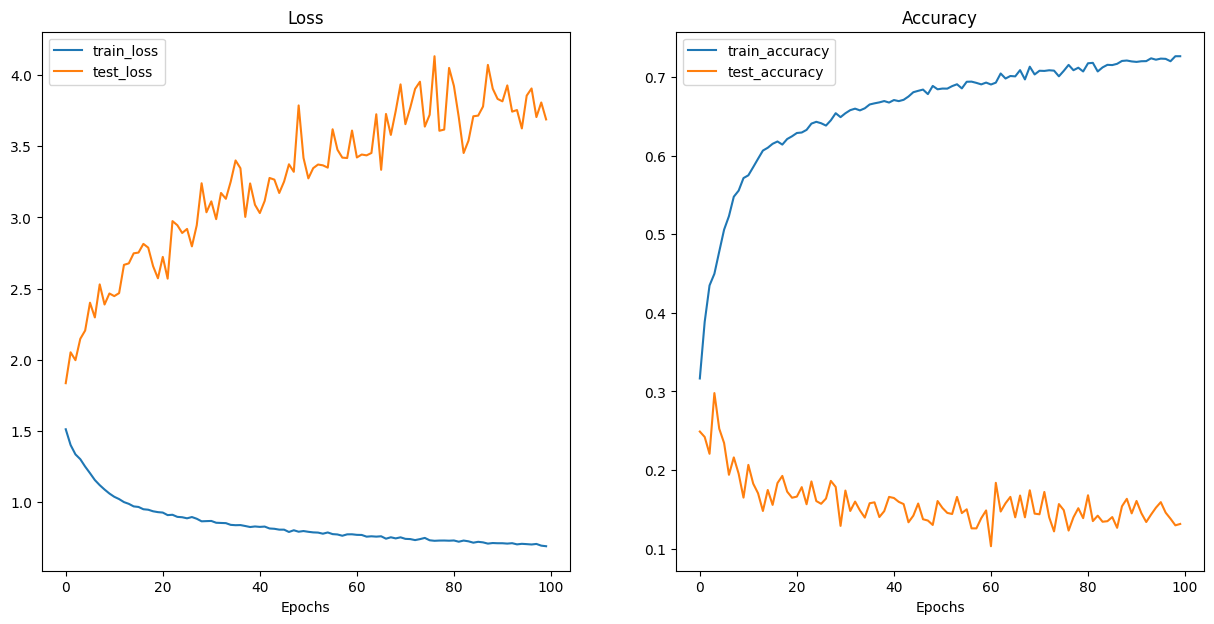

In [13]:
plot_loss_curves(model_results)

## Zapisanie modelu

In [14]:
model_save_path = "../models/cnn_lstm_model_all.pth"

torch.save(obj=model.state_dict(),
             f=model_save_path)